In [15]:
%pip install -r requirements.txt --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.plotting import plot_decision_regions
import hdbscan
import mglearn
"""This file is downloaded from Kaggle, which is an online platform and global community for data science and machine learning, offering competitions (even with monetary prizes), public datasets, code notebooks, and courses for enthusiasts and 
professionals to learn, practice, and develop professionally in the field of data science."""

# Load the CSV file as a dataframe
file_path="mobile_data.csv"

""" The CSV is a plain text file that stores data in a tabular format (rows and columns), 
where each value is separated by a delimiter, which is usually a comma.""" 

mobile_data=pd.read_csv(file_path)
"""
Although here pandas' read_csv is used, it could be loaded using this code as if it were a Python dictionary,
as in the following example:

with open("mobile_data.csv", newline="", encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter=",")
    columns = reader.fieldnames
    rows = [dict(rows) for rows in reader]
print([rows["price"] for rows in rows])
"""

# Checking the quality of the data and their information (records and characteristics)
mobile_data.info()
# Here you can obtain the number of records and characteristics
number_of_records=mobile_data.shape[0]
number_of_features=mobile_data.shape[1]
# View the first values
mobile_data.head()


Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int64
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int64
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price
0,1954,0,5,1,0,0,24,8,187,4,...,1149,700,16,3,5,1,1,1,0,27
1,1445,1,5,0,0,0,53,7,174,7,...,836,1099,17,1,20,1,0,0,0,28
2,509,1,6,1,2,1,9,1,93,5,...,1224,513,19,10,12,1,0,0,0,25
3,1866,0,5,0,13,1,52,7,185,1,...,563,373,14,9,3,1,0,1,0,25
4,775,0,10,0,3,0,46,7,159,2,...,1864,568,17,15,11,1,1,1,0,32


In [16]:
# Here I get the correlations between all the values in a matrix
corr_matrix = mobile_data.corr()
# This gives me the correlations of price range including with itself
corr_price_range=corr_matrix["price_range"]
# I organize in ascending order
series_corr=corr_price_range.sort_values(ascending=False, key=abs)
# I obtain the 5 variables with the highest correlation excluding with itself
var_5_max_correlation=series_corr[1:6]
print("All correlations of price range")
print(corr_price_range)
print("The 5 highest correlations excluding with itself")
var_5_max_correlation

All correlations of price range
battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
price            0.879636
Name: price_range, dtype: float64
The 5 highest correlations excluding with itself


ram              0.917046
price            0.879636
battery_power    0.200723
px_width         0.165818
px_height        0.148858
Name: price_range, dtype: float64

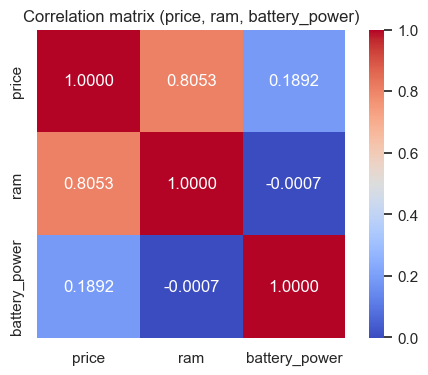

In [17]:
var_correlations=mobile_data[["price", "ram", "battery_power"]]
corr_matrix_3_var = var_correlations.corr()

# Visualize the correlation matrix with a heatmap

plt.figure(figsize=(6, 4))
sns.heatmap( corr_matrix_3_var, annot=True, fmt=".4f", cmap="coolwarm", square=True)
plt.title("Correlation matrix (price, ram, battery_power)")
plt.show()


c:\Users\AlbeyYoli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


coefficients w [[0.44505583]]
intercept [-406.61762048]
R-squared: 0.6631
Mean absolute error: 260.0897


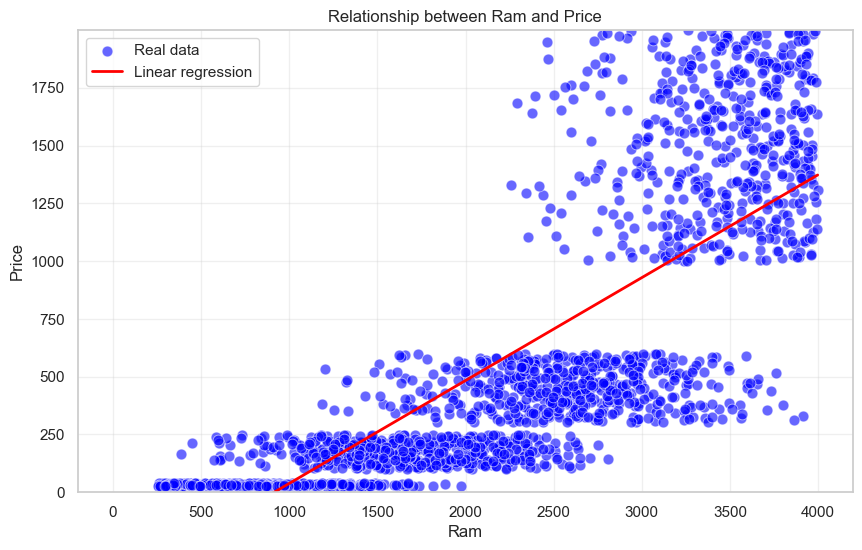

the estimated price in € is  973.055441934459


In [18]:
x=mobile_data[["ram"]]
y=mobile_data[["price"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99)
model=LinearRegression()
model.fit(x_train, y_train)
y_train_pred=model.predict(x_train)
y_pred = model.predict(x_test)
w=model.coef_
b=model.intercept_
print("coefficients w" , w)
print("intercept", b)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae:.4f}") 
"""As observed with the two metrics, the fit is not entirely good; perhaps it could be improved by adding 
other features or creating a more complex model."""
# Style of the plot
sns.set_theme(style="whitegrid", context="notebook", palette="deep")
plt.figure(figsize=(10,6))

# Real data points

sns.scatterplot(x="ram", y="price", data=mobile_data, color="blue", alpha=0.6, s=60, label="Real data")

x_line = np.linspace(0, x["ram"].max(), 200).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="red", linewidth=2, label="Linear regression")

# Chart details
plt.ylim(0, y["price"].max()) 
plt.xlabel("Ram")
plt.ylabel("Price")
plt.title("Relationship between Ram and Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
ram_to_predict= 3100
estimated_price = w[0][0] * ram_to_predict + b[0]
print("the estimated price in € is ", estimated_price)

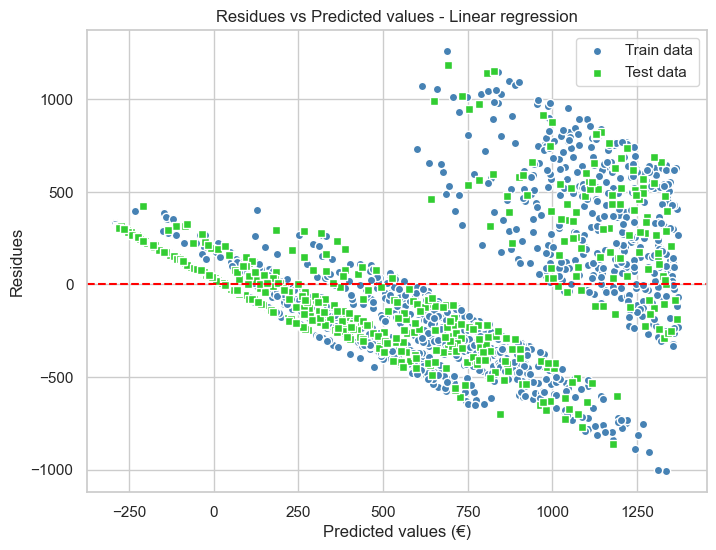

In [19]:
# Calculate residues
y_test_array = np.array(y_test).ravel()
y_pred_array = np.array(y_pred).ravel()

residues_test = y_test_array - y_pred_array
residues_train = y_train - y_train_pred 

# Residual plot for training and testing data
plt.figure(figsize=(8,6))
plt.scatter(y_train_pred, residues_train, c='steelblue', marker='o',
            edgecolor='white', label='Train data')
plt.scatter(y_pred_array, residues_test, c='limegreen', marker='s',
            edgecolor='white', label='Test data')

plt.axhline(0, color='red', linestyle='--')  # base line in 0
plt.xlabel("Predicted values (€)")
plt.ylabel("Residues")
plt.title("Residues vs Predicted values - Linear regression")
plt.legend()
plt.show()

Accuracy of the test is: 0.8240


c:\Users\AlbeyYoli\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


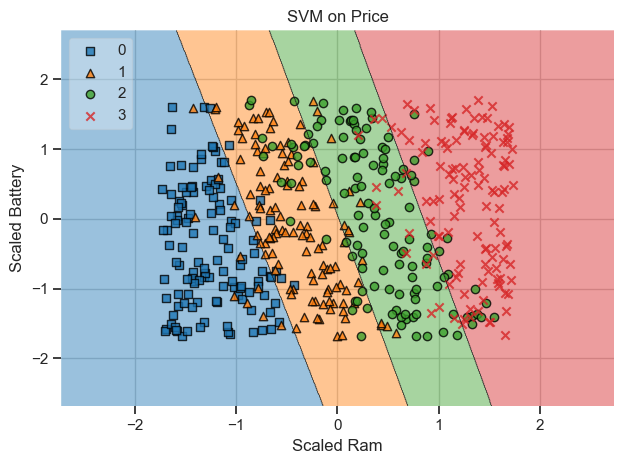

In [20]:
""" With linear SVC"""

# Variables
x = mobile_data[['ram', 'battery_power']].values
y = np.array(mobile_data['price_range'])


# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, stratify=y)
# Scale the variables
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# SVM classifier with linear kernel
svm = SVC(kernel='linear', C=1.0, random_state=99)
svm.fit(x_train_scaled, y_train)


# Predictions
y_pred = svm.predict(x_test_scaled)


# accuracy in test
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of the test is: {acc:.4f}")

# Decision region with data that the model has not seen
plot_decision_regions(x_test_scaled, y_test, clf=svm, legend=2)

# Adding the axes
plt.xlabel('Scaled Ram')
plt.ylabel('Scaled Battery')
plt.title('SVM on Price')
plt.tight_layout()
plt.show()

Accuracy of the test is: 0.8100


c:\Users\AlbeyYoli\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


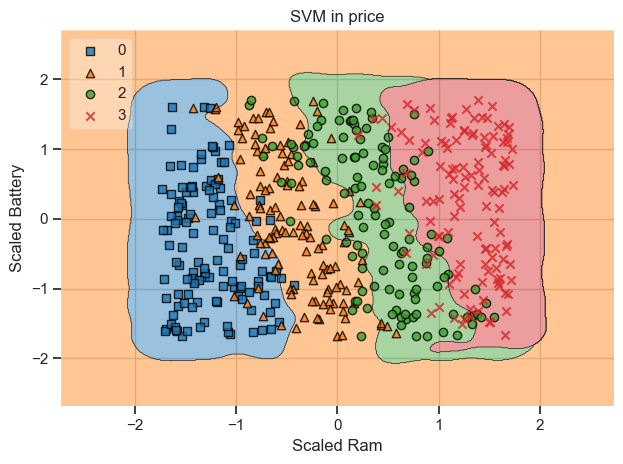

'As observed, the result is slightly worse due to the overfitting caused by such a high gamma, \neven though it gives some curvature to the regions.'

In [21]:
# SVM rbf classifier with gamma=20
svm = SVC(kernel='rbf', gamma = 20, C=1.0, random_state=99)
svm.fit(x_train_scaled, y_train)


# Predictions
y_pred = svm.predict(x_test_scaled)


# Accuracy in test
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of the test is: {acc:.4f}")

# Decision region with data that the model has not seen
plot_decision_regions(x_test_scaled, y_test, clf=svm, legend=2)

# adding the axles
plt.xlabel('Scaled Ram')
plt.ylabel('Scaled Battery')
plt.title('SVM in price')
plt.tight_layout()
plt.show()
"""As observed, the result is slightly worse due to the overfitting caused by such a high gamma, 
even though it gives some curvature to the regions."""

Accuracy of the test is: 0.8200


c:\Users\AlbeyYoli\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


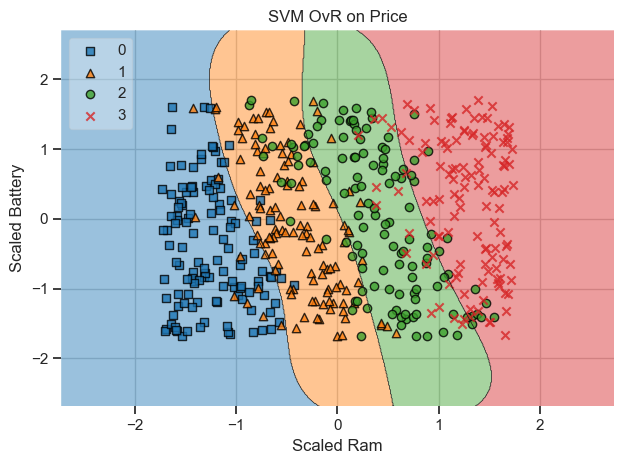

In [22]:
"""OvR with SVC"""

# SVM OvR classifier
svm = OneVsRestClassifier(SVC(random_state=99))
svm.fit(x_train_scaled, y_train)

# Predictions
y_pred = svm.predict(x_test_scaled)

# Accuracy in test
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of the test is: {acc:.4f}")

# Decision region with data that the model has not seen
plot_decision_regions(x_test_scaled, y_test, clf=svm, legend=2)

# Adding the axes
plt.xlabel('Scaled Ram')
plt.ylabel('Scaled Battery')
plt.title('SVM OvR on Price')
plt.tight_layout()
plt.show()


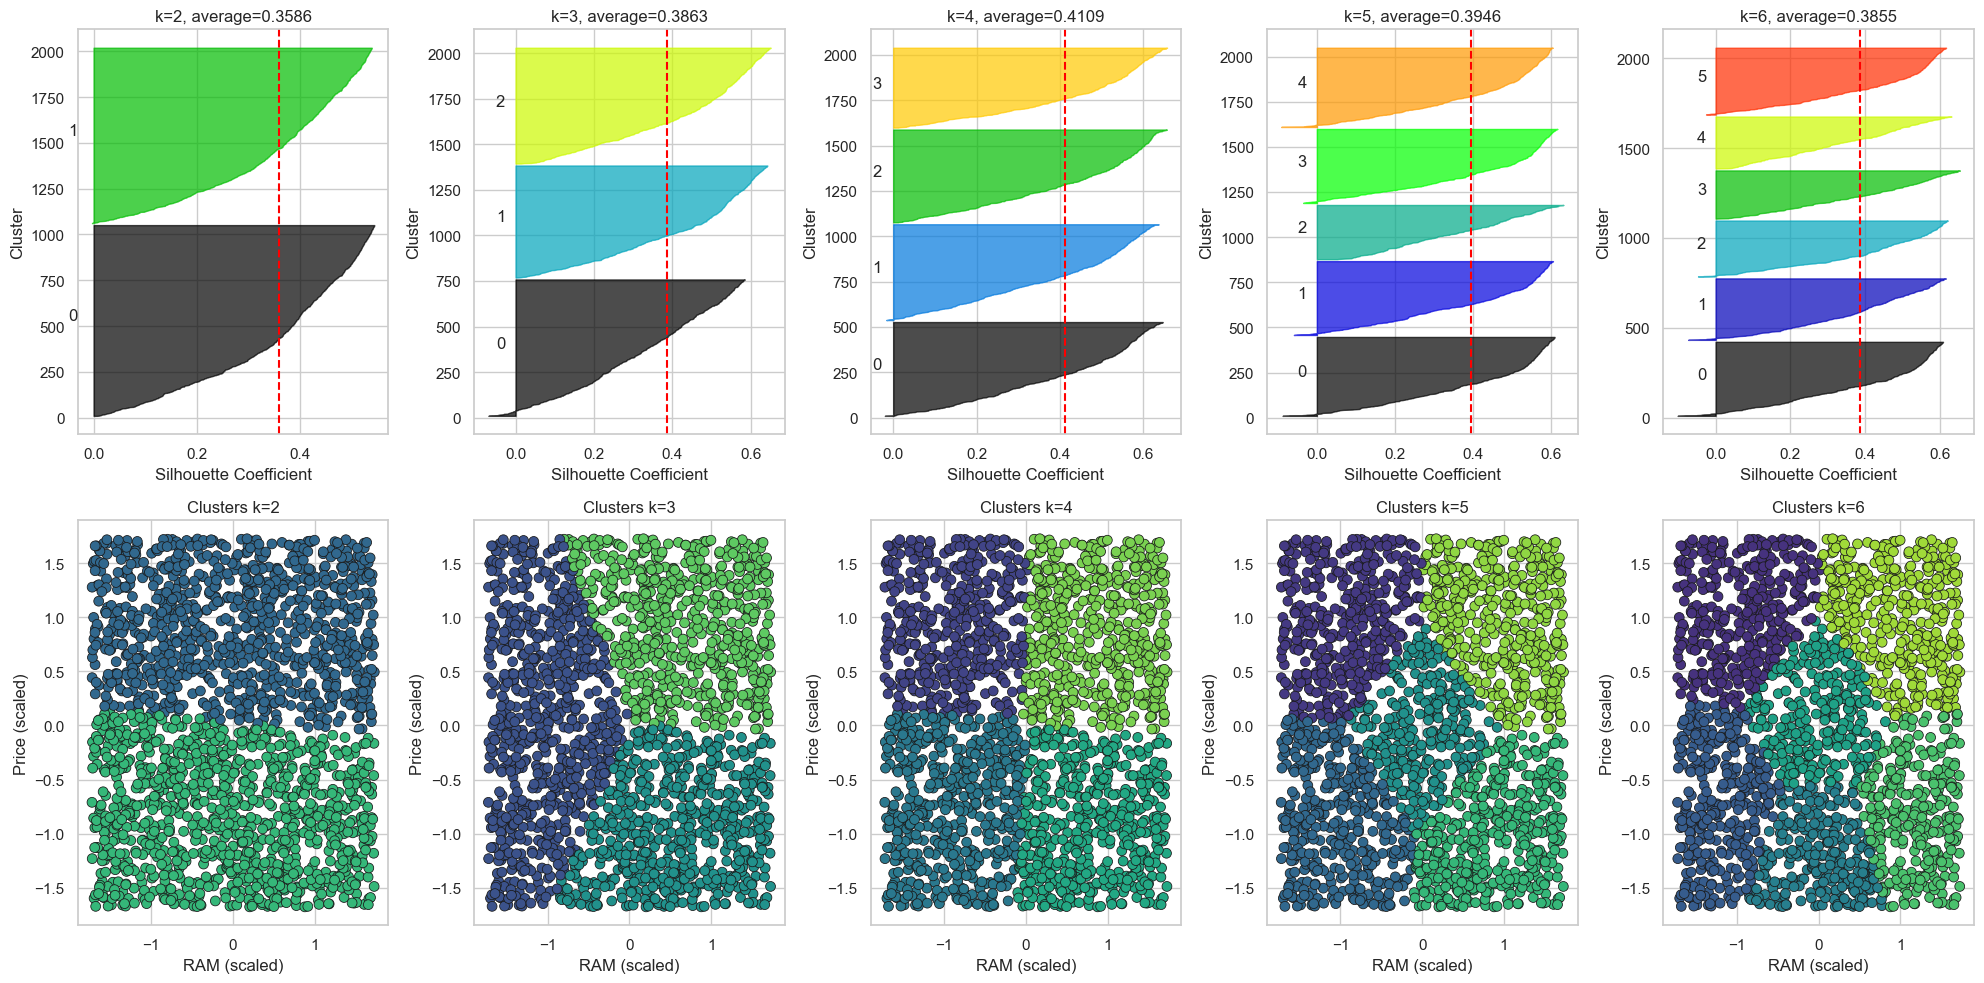

'As observed, the most suitable value would be k=4 which we had by default in the original dataframe although k=3 and k=5 are also acceptable values'

In [23]:
"""Using Kmeans"""
"""Since I have 2 input values, it would be most logical to propose 2 or 3 clusters as a starting point or final choice, but it is best 
to use graphical methods and the silhouette method to select the appropriate values.
"""
# Scale data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['ram', 'price'])
ks=[2,3,4, 5 ,6]

# Number of clusters to evaluate

ks = [2, 3, 4, 5, 6]

# Prepare plots
fig, axes = plt.subplots(2, len(ks), figsize=(4*len(ks), 10))

for i, k in enumerate(ks):
    # Train K-means
    kmeans = KMeans(n_clusters=k, random_state=99, n_init=10)
    labels = kmeans.fit_predict(x_scaled)
    df_scaled['cluster'] = labels.astype(str)  
    
    # Silhouette graph 
    ax = axes[0, i]
    silhouette_avg = silhouette_score(x_scaled, labels)
    sample_silhouette_values = silhouette_samples(x_scaled, labels)

    y_lower = 10
    for j in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")
    ax.set_title(f"k={k}, average={silhouette_avg:.4f}")


    # Cluster graph
 
    ax2 = axes[1, i]
    sns.scatterplot(data=df_scaled, x='ram', y='price', hue='cluster',
                    palette='viridis', ax=ax2, s=50, edgecolor='k', legend=False)
    ax2.set_xlabel("RAM (scaled)")
    ax2.set_ylabel("Price (scaled)")
    ax2.set_title(f"Clusters k={k}")

plt.tight_layout()
plt.show()
"""As observed, the most suitable value would be k=4 which we had by default in the original dataframe although k=3 and k=5 are also acceptable values"""

Number of clusters found with DBSCAN: 4
Number of clusters found with HDBSCAN: 81


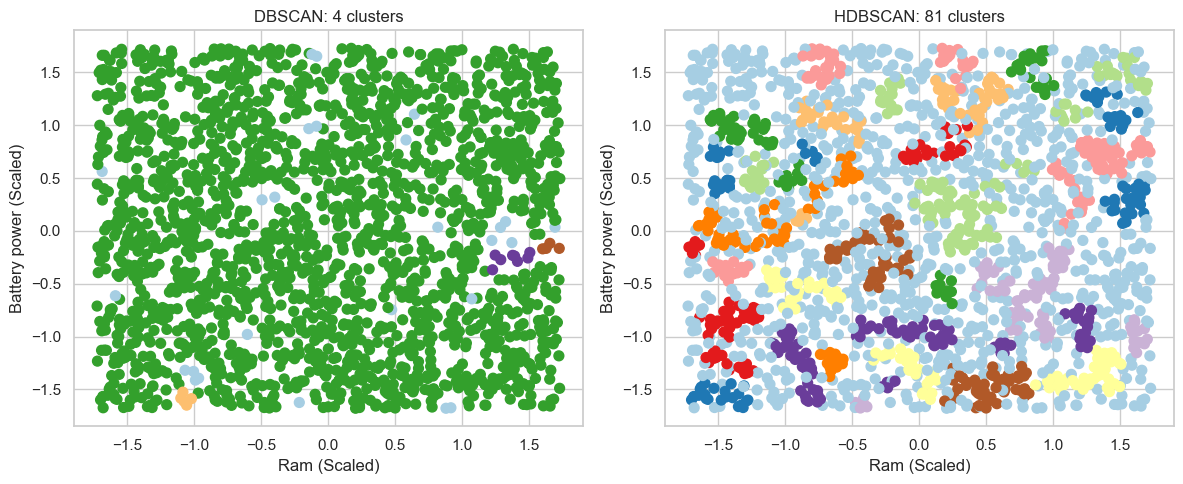

In [24]:
# DBSCAN
#Algorithm to calculate the automatic epsilon
def estimate_eps(x, k=5):
    # Calculate distances to the k-th neighbor
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(x)
    distances, indexes = neighbors_fit.kneighbors(x)
    distances_k = np.sort(distances[:, k-1])
    
    # Normalize the indexes and distances
    n_points = len(distances_k)
    all_indexes = np.arange(n_points)
    distances_norm = (distances_k - distances_k.min()) / (distances_k.max() - distances_k.min())
    indexes_norm = all_indexes / n_points

    # Calculate perpendicular distance to the final segment (simplified "kneedle" method)
    line_start = np.array([indexes_norm[0], distances_norm[0]])
    line_end   = np.array([indexes_norm[-1], distances_norm[-1]])
    line_vec   = line_end - line_start
    line_vec /= np.linalg.norm(line_vec)
    
    # Perpendicular distance from each point to the line
    vec_from_start = np.vstack([indexes_norm, distances_norm]).T - line_start
    scalar_proj = np.dot(vec_from_start, line_vec)
    vec_proj = np.outer(scalar_proj, line_vec)
    vec_perp = vec_from_start - vec_proj
    dist_perp = np.linalg.norm(vec_perp, axis=1)
    
    # The automatic eps is the k-nearest neighbor distance where the perpendicular is maximum
    eps_auto = distances_k[np.argmax(dist_perp)]
    return eps_auto
eps_estimado=estimate_eps(x_scaled)    
dbscan = DBSCAN(eps=eps_estimado, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_scaled)

# Number of clusters (excluding noise, label = -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found with DBSCAN: {n_clusters}")

hdb = hdbscan.HDBSCAN() #Default values
hdb_labels = hdb.fit_predict(x_scaled)

n_clusters_hdb = len(set(hdb_labels)) - (1 if -1 in hdb_labels else 0)
print(f"Number of clusters found with HDBSCAN: {n_clusters_hdb}")


plt.figure(figsize=(12,5))


# DBSCAN Visualization

plt.subplot(1,2,1)
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=dbscan_labels, cmap='Paired', s=50)
plt.title(f'DBSCAN: {n_clusters} clusters')
plt.xlabel('Ram (Scaled)')
plt.ylabel('Battery power (Scaled)')

# HDBSCAN graph

plt.subplot(1,2,2)
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=hdb_labels, cmap='Paired', s=50)
plt.title(f'HDBSCAN: {n_clusters_hdb} clusters')
plt.xlabel('Ram (Scaled)')
plt.ylabel('Battery power (Scaled)')


plt.tight_layout()
plt.show()


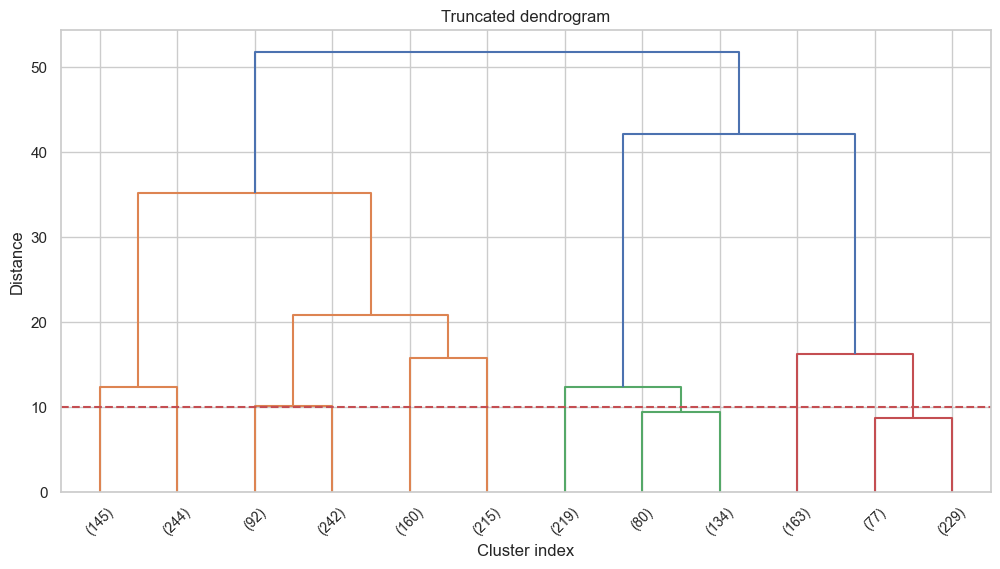

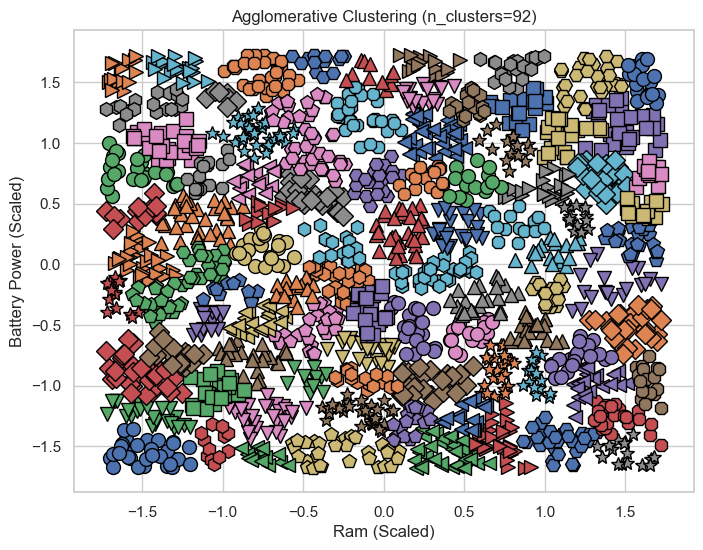

In [25]:
# With agglomerative clustering, I choose an appropriate value using the dendrogram method. 
# The linkage method calculates the hierarchical merges.
linked = linkage(x_scaled, method="ward") 

# Dendrograma graph
plt.figure(figsize=(12,6))
dendrogram(linked,
           truncate_mode="lastp",  # This is for the last clusters
           p=12,                   
           show_leaf_counts=True,
           leaf_rotation=45.,
           leaf_font_size=10.)
plt.axhline(y=10, color='r', linestyle='--')  # Cut line at distance 10 (adjust)
plt.title("Truncated dendrogram")
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.show()

# According to the dendrogram, an appropriate number would be 92
agg = AgglomerativeClustering(n_clusters=92, linkage="ward")
agg_labels = agg.fit_predict(x_scaled)
# Visualize the clustering
plt.figure(figsize=(8,6))
mglearn.discrete_scatter(x_scaled[:, 0], x_scaled[:, 1], agg_labels)
plt.title(f"Agglomerative Clustering (n_clusters={len(set(agg_labels))})")
plt.xlabel("Ram (Scaled)")
plt.ylabel("Battery Power (Scaled)")
plt.show()


In [26]:
# Here I select the entire dataframe, but normally you would leave a label for and reduce the rest using the PCA technique.
# Normally, it would be price, for example, the value, and there are no problems either because all the columns are numerical.
scaler = StandardScaler()
x_scaled_all_data = scaler.fit_transform(mobile_data)
pca = PCA()
x_pca = pca.fit_transform(x_scaled_all_data)
# Variance explained by each component
ratio_variance = pca.explained_variance_ratio_
cumulative_variance = ratio_variance.cumsum()
n_components = (cumulative_variance >= 0.95).argmax() + 1
print(f"{n_components} components are required to explain approximately 95% of the variance out of a total of 22.")

18 components are required to explain approximately 95% of the variance out of a total of 22.
